In [47]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

In [22]:
rv = norm(loc=1, scale=0)

In [106]:
y = []
_x = np.linspace(-5, 5, 100)
for x in _x:
    y.append(norm.logcdf(x, loc=0, scale=1))

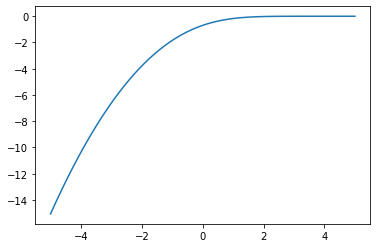

In [107]:
plt.plot(_x, y)

In [79]:
import math
x = np.array([1, 2])
sigma = np.identity(2)

a = np.array([12, 1])
b = np.array([2, 10])

d = a - b
print(x, d)

[1 2] [10 -9]


In [82]:
varAlongD = (d * sigma * d.T)[0]
print(np.sqrt(varAlongD))
meanAlongD = d.reshape(-1,).dot(x.reshape(-1,))
print(meanAlongD)
# norm.logcdf(meanAlongD, 0, np.sqrt(varAlongD))
np.log(norm.cdf(meanAlongD + 0.5, 0, np.sqrt(varAlongD)) - norm.cdf(meanAlongD - 0.5, 0, np.sqrt(varAlongD)))

[10.  0.]
-8


array([-3.54167366,         nan])

In [ ]:
norm.pdf()

In [112]:
norm(0, 1).rvs()

-0.894385450010955

# Log regression

In [9]:
import numpy as np
import src.bayes_logistic as bl

In [222]:
hidden_weights = np.array([0.8, 0.2])
utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1] 

range_1 = [0, 200]
range_2 = [-13, -1]

In [224]:
from random import randint

X = []
Y = []

w_prior = np.ones(len(hidden_weights)) / len(hidden_weights)

for _ in range(20):
    p1 = np.array([randint(range_1[0], range_1[1]), randint(range_2[0], range_2[1])])
    p2 = np.array([randint(range_1[0], range_1[1]), randint(range_2[0], range_2[1])])
    x = p1 - p2
    X.append(x)
    Y.append(float(utility(p1) >= utility(p2)))
    
    # Regression
    H_prior_diag = np.ones(len(hidden_weights)) * (1.0 / 0.33) ** 2

    w_fit, H_fit = bl.fit_bayes_logistic(np.array(Y),
                                         np.array(X),
                                         w_prior,
                                         H_prior_diag)
    unnorm_w = w_fit
    sum_w = sum(unnorm_w)
    print(unnorm_w / sum_w)
#     w_prior = unnorm_w / sum_w
    


[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.5 0.5]
[0.76710299 0.23289701]
[0.76746565 0.23253435]
[0.76750261 0.23249739]
[0.76828717 0.23171283]
[0.76831457 0.23168543]
[0.76868469 0.23131531]
[0.76861749 0.23138251]
[0.76957189 0.23042811]


In [151]:
w_prior = np.ones(len(hidden_weights)) / \
    len(hidden_weights)
H_prior_diag = np.ones(
    len(hidden_weights)) * (1.0 / 0.33) ** 2

print(w_prior)
w_fit, H_fit = bl.fit_bayes_logistic(Y,
                                     X,
                                     w_prior,
                                     H_prior_diag)
unnorm_w = w_fit
sum_w = sum(unnorm_w)
print(unnorm_w / sum_w)


[0.5 0.5]
[0.50054316 0.49945684]


In [331]:
solutions = [
    [5, -1],
    [80, -3],
    [120, -5],
    [140, -7],
    [145, -8],
    [150, -9],
    [163, -13],
    [166, -14],
    [173, -17],
#     [175, -19],
    
]

# weights = [0.43418691, 0.56581309]
weights = [0.36666223, 0.63333777]

def get_best_sol(weights):
    utility = lambda x: weights[0] * x[0] + weights[1] * x[1]

    best_u = -1000
    best_sol = 0

    for sol in solutions:
        if utility(sol) > best_u:
            best_u = utility(sol)
            best_sol = sol

    return best_sol

In [305]:
get_best_sol([0.36666223, 0.63333777])

[173, -17]

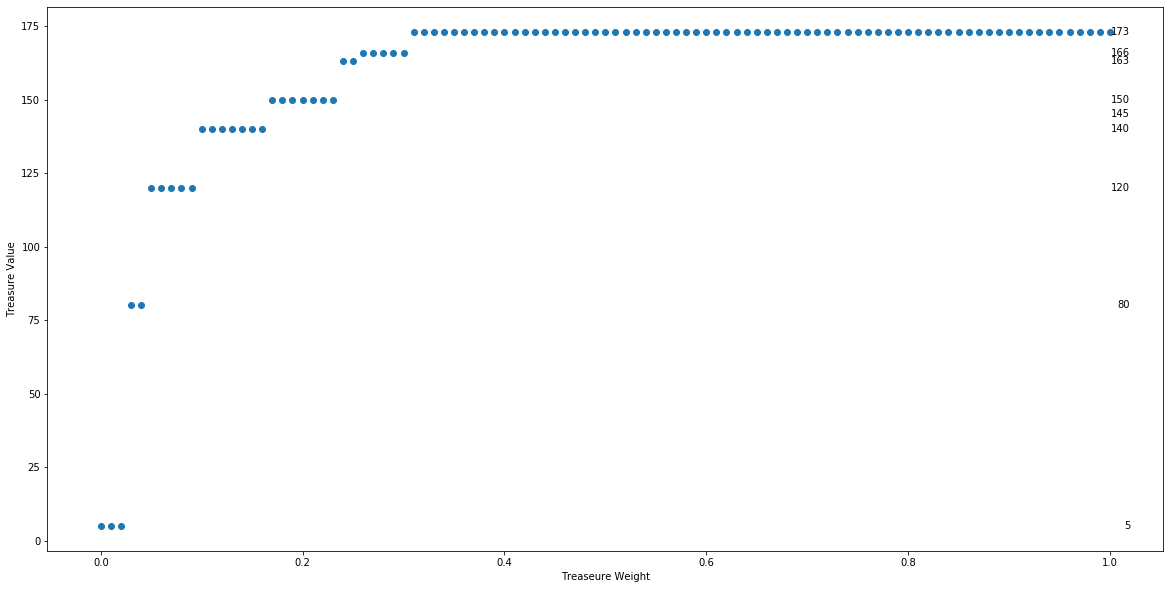

In [341]:
import matplotlib.pyplot as plt

y = []
u = []
weights_line = np.arange(0, 1.01, 0.01)

for w in weights_line:
    val = get_best_sol([w, 1-w])
    u.append(w * val[0] + (1-w) * val[1])
    y.append(val[0])
#     print(w, val)

plt.figure(figsize=(20, 10))
plt.scatter(x=weights_line, y=y)
plt.xlabel("Treaseure Weight")
plt.ylabel("Treasure Value")

for sol in solutions:
#     plt.hlines(sol[0], 0, 1, linestyles='dashed')
    plt.text(1.02, sol[0], sol[0], ha='right', va='center')

In [325]:
unique_y = set(y)
unique_y

{5, 80, 120, 140, 150, 163, 166, 173}

In [326]:
len(unique_y)

8

In [342]:
print(u[-10:])
print(weights_line[-10:])

[155.9, 157.8, 159.70000000000002, 161.6, 163.50000000000003, 165.39999999999998, 167.3, 169.2, 171.10000000000002, 173.0]
[0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [359]:
hidden_weights = [0.2, 0.8]

utility = lambda x: hidden_weights[0] * x[0] + hidden_weights[1] * x[1]

max_u = utility(get_best_sol(hidden_weights))
print(max_u)

22.8


In [355]:
utility([150, -9])

22.8

In [361]:
utility([173, -17])

21.0

In [362]:
for sol in solutions:
    print(utility(sol) / max_u)

0.008771929824561401
0.5964912280701754
0.8771929824561403
0.9824561403508771
0.9912280701754387
1.0
0.9736842105263159
0.9649122807017544
0.9210526315789473


In [364]:
w_list = np.arange(0, 1, 0.01)
u_list = []
for w in w_list:
    sol = get_best_sol([w, 1-w])
    u_list.append(utility(sol) / max_u)
    
    

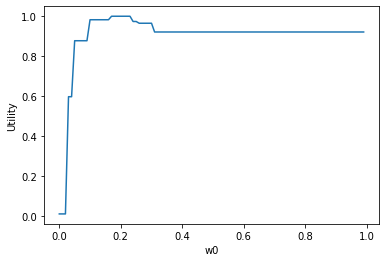

In [369]:
plt.plot(w_list, u_list);
plt.ylabel("Utility");
plt.xlabel("w0");